questions:

- Show the code, discuss results
    - Intéressant donc top
- Discuss analytical std
    - Discuss why first try does not give the same answer. If we take a big amoung of models, we cannot say that average passage is 
    - On est d'accord que le temps c'est un "sachant que" dans $p_i(t)$?
        - A réfléchir (faire un graphe de convergence)
- Discuss new idea for out state
    - Appendix
- Meilleur nom que Disc-Spiral ?
    - Inchworm
- Ask what is the title of the project
    - Exporation of possible structure based models of the mechanism of action of AAA+ ATPases
- Requirements for the report? Taille min? Juste un truc à viser?
    - Comme je pense que c'est bien 
- Conseils pour le rapport ? Structure, schémas ? Parler en "I" ou "we" ?
- Est-ce que c'est pertinent de présenter dans le rapport la GUI ?
    - Pas pertinent
- Est-ce que c'est pertinent d'en parler dans le rapport comment extend mon code (translocation model et aussi GUI) ?
    - Pas pertinent
- Je peux demander à une autre personne de faire l'animation ?
    - Oui
- Ask when is the defense
    - 26 février


In [1]:
%matplotlib widget

from experiments import VelocityVsATPADPRatio, SC2RVsDiscSpiral, \
    VelocityVsPotential, DefectlessVsDefective, NonIdeal

# Comparison between SC/2R and Disc-Spiral models

In [2]:
sc2r_vs_disc_spiral = SC2RVsDiscSpiral()

# Relation between ATP/ADP concentrations ratio and velocity

In [ ]:
velocity_vs_atp_adp_ratio = VelocityVsATPADPRatio()

# Velocity in presence of a potential

In [ ]:
velocity_vs_barrier = VelocityVsPotential()

# Defective protomer

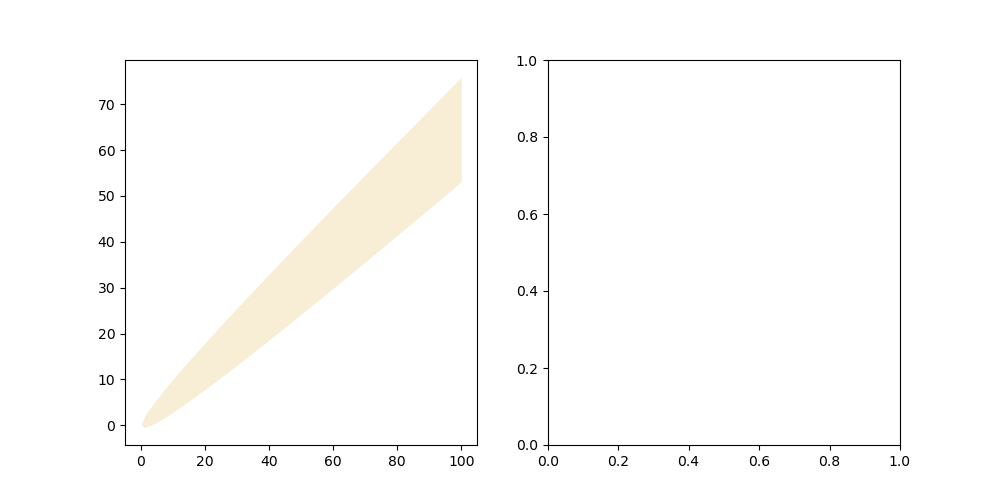

In [4]:
defectless_vs_defective = DefectlessVsDefective()

# Non-Ideal Models

In [3]:
non_ideal = NonIdeal()

# Report

# Introduction

# Theroy of master equation and kinetic scheme

Consider a stochastic system evolving continuously in time, jumping from one discrete state to another. The state of the system at time $t$ is denoted by the random variable $S(t)=i$, where $i=1,2,\dots,N$, and we assume that the state entirely determines the system, i.e. the dynamics of the system is independent of its history. In other terms, the system is a continuous time Markov chain.
The transitions between the states represent physical or chemical reactions, that we assume are all reversible, and independent of each other. Each reaction $i\to j$ follows an exponential distribution of rate $k_{ij}$.
The dynamics is the following: the system starts in a given state $i$ at time $t=0$, sojourns there until one reaction $i\to j$ occurs, and then jumps to state $j$. The system then sojourns in state $j$ until another reaction $j\to k$ occurs, and so on. 

We can represent such a system with a kinetic scheme, a directed graph where each node reprsents a state, and each reaction $i\to j$ is represented by a directed edge from $i$ to $j$, weighted with the reaction rate $k_{ij}$. We denote the successors and predecessors of a state $i$ by $R_i^+$ and $R_i^-$ respectively. 
We assume that the kinetic scheme is connected, i.e. for any two states $i$ and $j$, there exists a path from $i$ to $j$. In the contrary case, the system would be composed of several independent subsystems, and we could study each subsystem separately. 

Given the stochastic nature of such a system, we are interested in the probability of being in state $j$ at a given time $t$, denoted by $p_j(t):=\mathbb{P}(S(t)=j)$ to simplify the notation. Its time evolution is given by the $N$ coupled differential master equations:
$$
    \dot{p}_j(t) = \sum_{i\in R_j^-}p_i(t)k_{ij} - p_j(t)\sum_{k\in R_j^+}k_{jk} = \sum_{i=1}^N \left(p_i(t)k_{ij} - p_j(t)k_{ji}\right)
$$
where we used the convention $k_{ii}=0$ for all $i$ and $k_{ij}=0$ if there is no edge from $i$ to $j$ in the kinetic scheme.
We can rewrite the master equation in matrix form:
$$
    \dot{\mathbf{p}}(t) = \mathbf{M}\mathbf{p}(t)
$$
where $\mathbf{p}(t)$ is the column vector of components $p_i(t)$ and $\mathbf{M}$ is the matrix of components $M_{ij}=k_{ji} - \delta_{ij}\sum_{k=1}^N k_{ik}$, where $\delta_{ij}$ is the Kronecker delta.
Knowing the initial condition $\mathbf{p}(0)$, we can solve the differential equation and obtain the solution:
$$
    \mathbf{p}(t) = e^{\mathbf{M}t}\mathbf{p}(0)
$$

These systems have interesting properties, the most important being the existence and uniqueness of an attracting steady-state distribution $\mathbf{p}^*$, which is in addition globally stable, i.e. any initial condition converges to $\mathbf{p}^*$ as $t\to\infty$, exponentially fast moreover. The properties of such systems are discussed in detail in \cite{Schnakenberg1976}, but for mathematical elegance, we give an alternative proof of the existence and uniqueness of the steady-state distribution in Appendix \ref{???} using solely linear algebra. 
To sum up, the stochastic matrix $M$ has rank $N-1$ and thus the steady-state distribution is given by the unique solution (up to a constant) solution of the linear system:
$$
    \mathbf{M}\mathbf{p}^* = 0
$$
and one has to take the normalized solution in order to have a probability distribution. 
A convenient way to directly find the steady-state distribution is to note that summing the first $N-1$ rows of the stochastic matrix gives back the last row with opposite sign
$$
    \sum_{i=1}^{N-1} M_{ij} = \sum_{i=1}^{N-1} k_{ji} - (1-\delta_{jN})\sum_{k=1}^N k_{jk} = -k_{jN} + \delta_{jN}\sum_{k=1}^N k_{Nk} = -M_{Nj}
$$
which means that we can remove the last row without changing the solution of the linear system. Therefore, we modify $M$ to $\tilde{M}$ by replaceing the last row with ones, and then the normalized steady-state distribution is given by the solution of the linear system:
$$
    \tilde{\mathbf{M}}\mathbf{p}^*
    =
    \begin{bmatrix}
        M_{1,1} & \cdots & M_{1,N} \\ 
        \vdots  & \ddots & \vdots  \\ 
        M_{N-1,1} & \cdots & M_{N-1,N} \\ 
        1 & \cdots & 1
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
        p_1^*\\ 
        \vdots\\ 
        p_{N-1}^*\\ 
        p_N
    \end{bmatrix}
    =
    \begin{bmatrix}
        0\\ 
        \vdots\\ 
        0\\ 
        1
    \end{bmatrix}
$$
since the newly added row constraints the solution to be normalized. This gives a general method to solve any system defined by a master equation or equivalently a kinetic scheme. However note that solving the system in such a way does not directly give a deep understanding of the system. As we will see later, the physical meaning comes to us after algebraic manipulations of the solution. Unfortunately, such manipulations are model-dependent and cannot be generalized, as far as I know.


## Thermodynamic loops

At equilibrium, we postulate that the detailed balance holds, i.e. each elementary process $i\to j$ is in equilibrium with its reverse process $j\to i$. More intuitively, this means that the flux of probability from $i$ to $j$ is equal to the flux from $j$ to $i$. Mathematically, this is expressed by the following equation:
$$
    \left.\left(p_i^*k_{ij}\right)\right|_{eq.} = \left.\left(p_j^*k_{ji}\right)\right|_{eq.} 
    \Leftrightarrow \left.\left(\frac{p_i^*k_{ij}}{p_j^*k_{ji}}\right)\right|_{eq.} = 1
$$
for all $i,j$, where $p_i^*$ is the equilibrium probability of being in state $i$. The equilibrium probability distribution is the steady-state distribution the isolated system will reach. The system is isolated in the sense that no external agent is driving the system out of equilibrium, so for example the system is not in contact with a heat bath, no force is applied to it, no ATP input, etc, i.e. all the rates $k_{ij}$ are at their equilibrium values $\left.k_{ij}\right|_{eq.}$.

Now consider any closed loop in the equilibrium kinetic scheme, i.e. a sequence of reactions $i_1\to i_2\to\dots\to i_n\to i_1$ where $i_1,\dots,i_n$ are distinct states. We can write the corresponding reactions rates as $k_{i_1i_2},\dots,k_{i_ni_1}$, and the equilibrium probability of being in state $i_1$ is denoted by $p_{i_1}^*$. Multiplying all the detailed balance equations for each reaction in the loop, using the convention $i_{n+1}=i_1$, we obtain:
$$
    1
    = \left.\left(\prod_{j=1}^n \frac{p_{i_j}^*k_{i_ji_{j+1}}}{p_{i_{j+1}}^*k_{i_{j+1}i_j}}\right)\right|_{eq.}
    = \left.\left(\frac{\left(\prod_{j=1}^n p_{i_j}^*\right)\left(\prod_{j=1}^n k_{i_ji_{j+1}}\right)}{\left(\prod_{j=1}^n p_{i_{j+1}}^*\right)\left(\prod_{j=1}^n k_{i_{j+1}i_j}\right)}\right)\right|_{eq.}
    = \left.\left(\frac{\prod_{j=1}^n k_{i_ji_{j+1}}}{\prod_{j=1}^n k_{i_{j+1}i_j}}\right)\right|_{eq.}
$$
i.e. at equilibrium the product of the reaction rates in a direction of the loop is equal to the product of the reaction rates in the reverse direction. This thermodynamic loop law gives constraints on the rates of the reactions in the loop. In particular, this means that in such a closed loop, when all the rates except one are chosen, the last one is fixed by the thermodynamic loop law. Note that this law holds even if the loop is connected to other reactions.

Now if the system is not isolated, its steady-state probability distribution would be a priori different from the equilibrium one. In steady-state, the detailed balance would not hold, and the thermodynamic loop law would be modified as follows:
$$
    \frac{\prod_{j=1}^n k_{i_ji_{j+1}}}{\prod_{j=1}^n k_{i_{j+1}i_j}} 
    = \exp\left(\frac{\Delta\mu}{T}\right)
$$
where $\Delta\mu\neq 0$ is a thermodynamic force difference, that drives the loop out of equilibrium. Now imagine we isolate the system and wait until it reaches steady-state, which is the equilibrium state in this particular case. In such a situation, the thermodynamic loop law would hold again, and this even though the system was not isolated in the first place. We conclude that for any system in steady-state (not necessarily equilibrium), the thermodynamic loop law holds for the equilibrium rates, which is especially powerful for constants rates, i.e. the ones that are similar in and out of equilibrium, because the equilibrium loop law gives a constraint even out of equilibrium.

Finally, one could think that each loop in the kinetic scheme gives a constraint on the rates, but this is not true. Indeed, all the constraints are not independent. Ref. \ref{???} shows that for a chosen basis of the cycle space of the kinetic scheme, each fundamental cycle gives an independent constraint on the rates. The choice of the basis is not unique but any choice will give the same set of constraints. The number of fundamental cycles really depends on the structure of the kinetic scheme and it must be determined case by case. 


## Quantities of interest

Given an initial probability distribution, we know its time evolution, as well as the steady-state distribution to which it converges. However, this distribution only tells us about the probability for the system to be in a given state, or equivalently a node on the kinetic scheme, but we are equally interested in quantities that changes when one or more reactions occur, and that are not encompassed in the state description of the system. For example, in the case of chaperones, we are interested in the position of the protein, which is not a state of the system, but rather a quantity that changes all along the trajectory. In this section we give general results that can be later applied in our specific models.

Consider a random variable $X(t)$ representing a quantity that evolves in time. We will only consider the case where $X$ takes values in $\mathbb{N}$ but the reasoning that follows can be generalized to other cases. 

In general, computing the exact probability distribution for such a quantity can be difficult, however it is easier to find a differential equation, in a similar manner as we derived the master equation, and then either solve it when possible, or use it to compute moments of the distribution.

We skip some steps of the full derivation of the differential equation because these are similar to the ones of the master equation above. Namely, a change of the quantity $X=x$ in a small time interval can either come from having $X=y\neq x$ and transitioning from $y$ to $x$ (positive change), or from having $X=x$ and transitioning from $x$ to another value $y$ (negative change) and transition are modeled by transition rates. The difference with the master equation above lies in the fact that here the transition rates are a priori not known.
Mathematically, if we write $p_x(t):=\mathbb{P}(X(t)=x)$ and $w_{xy}$ the transition rate from $x$ to $y$, using the convention $w_{xx}=0$, the differential equation is:
$$
    \dot{p}_x(t) = \sum_{y\in\mathbb{N}} p_y(t)w_{yx} - p_x(t)\sum_{y\in\mathbb{N}} w_{xy}
$$

From Eq. \ref{???}, we find a differential equation for the $k$-th moment of the distribution multiplying by $x^k$ and summing over $x$ both sides of the equation:
$$
    \frac{d}{dt}\left\langle X^k(t) \right\rangle 
    = \sum_{x\in\mathbb{N}} x^k\dot{p}_x(t)
    = \sum_{x,y\in\mathbb{N}} x^k p_y(t) w_{yx} - \sum_{x,y\in\mathbb{N}} x^k p_x(t) w_{xy}
    = \sum_{x,y\in\mathbb{N}} p_y(t) w_{yx} \left(x^k - y^k\right)
$$
and similarly the characteristic function $\phi_X(\theta, t):=\left\langle e^{i\theta X(t)} \right\rangle$ satisfies the differential equation:
$$
    \frac{\partial}{\partial t}\phi_X(\theta, t) 
    = \sum_{x\in\mathbb{N}} e^{i\theta x}\dot{p}_x(t)
    = \sum_{x,y\in\mathbb{N}} e^{i\theta x} p_y(t) w_{yx} - \sum_{x,y\in\mathbb{N}} e^{i\theta x} p_x(t) w_{xy}
    = \sum_{x,y\in\mathbb{N}} p_y(t) w_{yx} \left(e^{i\theta x} - e^{i\theta y}\right)
$$
where we used the properties of dummy variables and the fact that we sum over the same set of values in both sums.

In the special case where the transition rates only depend on the difference between the two states, i.e. $w_{xy}=w_{x-y}$, Eqs. \ref{???} and \ref{???} simplify to:
$$
    \frac{d}{dt}\left\langle X^k(t) \right\rangle
    = \sum_{x,y\in\mathbb{N}} p_y(t) w_{x-y} \left(x^k - y^k\right)
    = \sum_{x,y\in\mathbb{N}} p_y(t) w_{x} \left((y+x)^k - y^k\right)
$$
and 
$$
    \frac{\partial}{\partial t}\phi_X(\theta, t) 
    = \sum_{x,y\in\mathbb{N}} p_y(t) w_{x-y} \left(e^{i\theta x} - e^{i\theta y}\right)
    = \sum_{x,y\in\mathbb{N}} p_y(t) w_{x} e^{i\theta y} \left(e^{i\theta x} - 1\right)
    = \sum_{y\in\mathbb{N}} p_y(t) e^{i\theta y} \sum_{x\in\mathbb{N}} w_{x} \left(e^{i\theta x} - 1\right)
    = \phi_X(\theta, t) \sum_{x\in\mathbb{N}} w_{x} \left(e^{i\theta x} - 1\right)
$$
where we did the change of variable $x\mapsto x+y$ and used the fact that we sum over the whole set $\mathbb{N}$.

We can directly solve Eq. \ref{???} with $\phi_X(0, t)=1$
$$
    \phi_X(\theta, t) = \exp\left(t \sum_{x\in\mathbb{N}} w_{x} \left(e^{i\theta x} - 1\right)\right)
$$

and then by inverting the Fourier transform, we obtain the probability distribution
$$
    p_x(t) = \frac{1}{\tau}\int_0^\tau \phi_X(\theta, t) e^{-i\theta x} d\theta = \frac{e^{-t \sum_{y\in\mathbb{N}} w_{y}}}{\tau}\int_0^\tau \exp\left(t \sum_{y\in\mathbb{N}} w_{y} e^{i\theta y} -i\theta x\right) d\theta
$$
with $\tau:=2\pi$, which can be solved analytically in some cases, but in general we have to resort to numerical methods.

Next, one is typically interested in the mean and standard deviation $\sigma$ of the distribution, which can be computed from the first and second moments:
$$
    \frac{d}{dt}\left\langle X(t) \right\rangle
    = \sum_{x,y\in\mathbb{N}} p_y(t) w_{x} x
    = \sum_{x\in\mathbb{N}} x w_{x}
    \implies \left\langle X(t) \right\rangle = \left\langle X(0) \right\rangle + t \sum_{x\in\mathbb{N}} x w_{x}
$$
$$
    \frac{d}{dt}\left\langle X^2(t) \right\rangle
    = \sum_{x,y\in\mathbb{N}} p_y(t) w_{x} \left(x^2 + 2xy\right)
    = \sum_{x\in\mathbb{N}} x^2 w_{x} + 2 \left\langle X(t) \right\rangle \underbrace{\sum_{x\in\mathbb{N}} x w_{x}}_{\frac{d}{dt}\left\langle X(t) \right\rangle}
$$
and thus
$$
    \frac{d}{dt}\text{Var}(X(t))
    = \frac{d}{dt}\left\langle X^2(t) \right\rangle - 2 \left\langle X(t) \right\rangle \frac{d}{dt}\left\langle X(t) \right\rangle
    = \sum_{x\in\mathbb{N}} x^2 w_{x}
    \implies \text{Var}(X(t)) = \text{Var}(X(0)) + t \sum_{x\in\mathbb{N}} x^2 w_{x}
    \implies \sigma(t) = \sqrt{\text{Var}(X(0)) + t \sum_{x\in\mathbb{N}} x^2 w_{x}}
$$

If we further assume that the quantity $X(t)$ changes when a reaction occurs, i.e. when an edge of the kinetic scheme is crossed, we can explicitely compute the transiton rates. Fix a value $x=x^*$ and consider all the reactions that modify the quantity $X$ by the value $x^*$. Then, the transition rate $w_{x^*}$ will be given by the sum of the rate $k$ times the probability of being in the initial state of the reaction, over all such edges. Mathematically, if we denote by $R_{x^*}$ the set of reactions that modify $X$ by $x^*$, we have:
$$
    w_{x^*} = \sum_{i\to j\in R_{x^*}} k_{ij} p_i
$$

Finally, from Eqs. \ref{???} and \ref{???}, the average rate of change of the quantity $X$ is given by:
$$
    \frac{d}{dt}\left\langle X(t) \right\rangle
    = \sum_{x\in\mathbb{N}} \sum_{i\to j\in R_{x}} x k_{ij} p_i
$$
which makes intuitive physical sense because it is the sum for all possible changes of the quantity $X$ of the rate of the reaction times the probability of being in the initial state of the reaction.


## Simulating trajectories via Gillespie algorithm

In general, the differential equations derived above cannot be solved analytically, and we have to resort to numerical methods. The most straightforward method is to simulate the trajectories of the system, i.e. the sequence of states visited by the system, and then computing statistics on these trajectories. 
But the simulated trajectories also serves the purpose of giving us confidence in the implementation of the simulations, by comparing the statistics found numerically with the analytical results when possible.

The Gillespie algorithm is a method to simulate trajectories of a stochastic system. It simulates a single particle progressing in time on the kinetic scheme, jumping from one state to another according to the transition rates. The simulation starts in a given state $i$ at time $t=0$, from where it sojourns until a reaction $i\to j$ occurs, and then jumps to state $j$. The system then sojourns in state $j$ until another reaction $j\to k$ occurs, and so on.

The sojourn time and the next states are random variables, and their distribution is as follows. Let'sconsider the event "reaction $i\to j^*$ occurs in an infinitesimally small interval $[\tau, \tau+\Delta t]$, and no other reaction occurs in $[0, \tau+\Delta t]$". In this case, the sojourn time would be $\tau$ and the next state would be $j*$. If we associate to each reaction $i\to j$ a random variable $T_{ij}$ representing the time until the reaction occurs, then the event abovementioned is equivalent to the event $\{(\tau < T_{ij*} < \tau + \Delta t) \wedge (T_{ij} > \tau + \Delta t \text{, } \forall j\neq j*)\}$. Given that all reactions are independent and follow an exponential distribution of rate $k_{ij}$, the probability of this event is given by:
$$
    \mathbb{P}\left((\tau < T_{ij*} < \tau + \Delta t) \wedge (T_{ij} > \tau + \Delta t \text{, } \forall j\neq j*)\right)
    = \mathbb{P}(\tau < T_{ij*} < \tau + \Delta t) \prod_{j\neq j*} \mathbb{P}(T_{ij} > \tau + \Delta t)
$$
$$
    = e^{-k_{ij*}\tau} \left(1 - e^{-k_{ij^*}\Delta t}\right) \prod_{j\neq j*} e^{-k_{ij}(\tau + \Delta t)}
    = e^{-\sum_j k_{ij}\tau} k_{ij^*} \Delta t + o(\Delta t)
$$
In the limit $\Delta t\to 0$, we identify the probability density
$$
    p(i\to j^*, \tau) = k_{ij^*} e^{-\sum_j k_{ij}\tau} = k_{i} e^{-k_{i}\tau} \frac{k_{ij^*}}{k_{i}}
$$
where $k_i := \sum_j k_{ij}$ is the total rate of leaving state $i$. Adding $\frac{k_i}{k_i}$ to the expression allows to easily sampling the sojourn time and next state $(\tau, j)$ individually. The first state indicates that the sojourn time before leaving the state is distributed exponentially where each reaction rate $k_{ij}$ contributes to the total rate $k_i$, and the second term indicates that the next state is randomly sampled from the set of possible states with probability proportional to the reaction rate $k_{ij}$.

With these mathematical considerations, we can detail the algorithm itself. We start in a random state, we chose to sample it from the steady-state probabilities associated to each state, so that we do not need to wait for the system to reach the said steady-state. Then, the sojourn time is sampled from an exponential distribution with rate the sum of all the reaction rates leaving the current state, and the next state is sampled from the set of possible states with probability proportional to the reaction rates. And then the simulation continues until a stopping criterion is reached, for example a fixed time or a fixed number of steps.

# Translocation models

The exact translocation dynamics of the chaperones along the amino acid chain is far from being perfectly understood. ??? et al. \cite{???} proposed a hand-over-hand model based on structural biology data, a Sequential Clockwise/2-Residue Step (SC/2R) (check if it is named that way in the original paper) where the 6 protomers are in a staircase configuration, the ATP-hydrolisis cycle allows the lowest protomer to slide up againt its neighbor along the chain, and stops forming the new stair tread 2 amino acids higher than the previous top-most protomer, and then the cycle repeats with the next protomer previously the second lowest now being the lowest to hydrolyse ATP to slide up. A video of the model can be found at \url{https://www.youtube.com/watch?v=???}. The exact implementation of this model within the kinetic scheme framework is detailed later.

Some implications from the SC/2R model do not match with experimental data, we will detail this more in a later section, and this motivated us to propose a new model, the [...] (concertina movement/locomotion) model. The chaperone oscillates between a flat configuration and a staricase configuration, moving by $2(6-1)=10$ amino acids per cycle. The details of the model are given later.

To implement a model in the kinetic scheme networks we start by considering the simplest case, an idealised version involving a minimal number of states and transitions to really capture the essence of the model, and then we add more complexity to take into account more realistic features.


## ATP/ADP-Protomer Exchange Model

Before detailing the translocation models, we should explain what is the source of energy that drives the translocation since, at equilibrium, the ATPase would in average stay in place. Naturally, in a volume containing a given number of ATP and ADP molecules, the $[\text{ATP}]/[\text{ADP}]$ concentration ratio would stabilize at its equilibrium value, approximately $10^{-5}$\cite{???}. However, in the cell, this ratio is maintained at a much higher value, around $10^3$ \cite{???}. The ATPases standing in the cytosol [to check] are in contact with a high concentration of ATP, and thus, as we will see, this favors an ADP-bounded protomer to exchange its nucleotide with an ATP lying in its environment.

Consider a volume containing proteins, with ATP and ADP floating around. These nucleotides can bound and unbound from the proteins with rates $k_{on}^T$, $k_{off}^T$ and $k_{on}^D$, $k_{off}^D$ respectively, where the superscripts $T$ and $D$ stand for the ATP and ADP nucleotides and the subscripts $on$ and $off$ stand for the binding and unbinding reactions. Denoting the concentrations with $[.]$, and using $P\equiv\text{Protein}$, $T\equiv\text{ATP}$ and $D\equiv\text{ADP}$ to simplify the notation, the kinetic scheme of this process is:
$$
    \begin{tikzcd}
        & T \arrow[dl, "k_{on}^T"] \arrow[dr, "k_{off}^T"] & \\
        T^* & & T
    \end{tikzcd}
    \qquad
    \begin{tikzcd}
        & D \arrow[dl, "k_{on}^D"] \arrow[dr, "k_{off}^D"] & \\
        D^* & & D
    \end{tikzcd}
$$
Using a simple bimolecular binding/unbinding model for the protomer-nucleotide interactions, the corresponding master equations are:
$$
\begin{aligned}
    \frac{d[PT]}{dt} &= k_{on}^T [P][T] - k_{off}^T [PT] \\
    \frac{d[PD]}{dt} &= k_{on}^D [P][D] - k_{off}^D [PD] \\
    \frac{d[P]}{dt} &= k_{off}^T [PT] + k_{off}^D [PD] - (k_{on}^T + k_{on}^D) [P]
\end{aligned}
$$
We omitted equation for ATP and ADP concentration evolution because we are ultimately interested in the steady-state of the system, and in steady-state these two equations are actually redundant with the three equations above. We assume that the sojounr time of the protein not bound to any nucleotide is much smaller than the binding/unbinding times, so we can assume $\dot{[P]}=0$ and thus $[P]=\frac{k_{off}^T [PT] + k_{off}^D [PD]}{k_{on}^T + k_{on}^D}$. Plugging this expression into the bounded complexes equations above and developping the result, we obtain:
$$
\begin{aligned}
    \frac{d[PT]}{dt} &= \underbrace{\frac{k_{off}^D k_{on}^T [T]}{k_{on}^T [T] + k_{on}^D [D]}}_{=:k_{DT}} [PD]
                        - \underbrace{\frac{k_{off}^T k_{on}^D [D]}{k_{on}^T [T] + k_{on}^D [D]}}_{=:k_{TD}} [PT]
\end{aligned}
$$
and a similar equation for $[PD]$ but with reversed signs, where we defined the effective exchange rates $k_{DT}$ and $k_{TD}$ for ADP $\to$ ATP and ATP $\to$ ADP exchange respectively. This means that under the assumption that the protein spend most of its time bound to a nucleotide, we can rewrite the ATP/ADP exchange as a single reaction:
$$
    \begin{tikzcd}
        & D \arrow[dl, "k_{DT}"] \arrow[dr, "k_{TD}"] & \\
        T & & D
    \end{tikzcd}
$$

One important thing here is that these effective exchange rates depend on the ATP/ADP concentrations, and thus a direction of the exchange is favored when the ATP/ADP ratio is not at its equilibrium value. In particular, looking at the ratio of rates
$$
    \frac{k_{DT}}{k_{TD}} 
    = \frac{k_{off}^D k_{on}^T}{k_{off}^T k_{on}^D} \frac{[T]}{[D]}
    = \frac{K_d^D}{K_d^T} \frac{[T]}{[D]}
$$
where $K_d^N:=\frac{k_{off}^N}{k_{on}^N}$ is the dissociation constant of the nucleotide $N$, we see that when the ATP/ADP concentration ratio is extraordinarily higher than its equilibrium value, as it is the case in cells, a protein in ADP-bound state will have a strong tendency to exchange its nucleotide with an ATP in its environment, and this is the source of energy that drives the translocation models defined later.

A last important relation is the following. Consider the ratio of the effective exchange rates at equilibrium:
$$
    \left.\frac{k_{DT}}{k_{TD}}\right|_{eq.}
    = \frac{K_d^D}{K_d^T} \left.\frac{[T]}{[D]}\right|_{eq.}
    = \frac{K_d^D}{K_d^T} \frac{[T]}{[D]} \frac{[D]}{[T]} \left.\frac{[T]}{[D]}\right|_{eq.}
    = \frac{k_{DT}}{k_{TD}} \left(\left.\frac{[T]}{[D]}\right|_{eq.} \bigg/ \frac{[T]}{[D]}\right)
$$
This is especially useful when a thermodynamic loop law involves the ratio of equilibrium exchange rates, because we can replace it by the non-equilibrium ratio of effective exchange rates times the shift of [ATP]/[ADP] concentration ratio from its equilibrium value. 


## Common features of the translocation models

Before defining the translocation models themselves, we first detail the common features of these models. The ATPase is made of $N$ protomers, for ... and ... we have $N=6$ but the model we will study can be easily extended to an arbitrary number of protomers. Each protomer can be either in ATP-bound state or ADP-bound state, and it can switch from ATP to ADP either by hydrolysis or nucleotide exchange (as detailes in Sec. \ref{???}), and it can switch from ADP to ATP either by spontaneous synthesis or nucleotide exchange. Each of these reactions are associated with a rate and correspond to a transition in the kinetic scheme. The rates are denoted as follows: $k_h$ for hydrolysis, $k_s$ for synthesis, $k_{DT}$ for ADP $\to$ ATP exchange and $k_{TD}$ for ATP $\to$ ADP exchange. All these rates are assumed to be similar for all protomers and all models. While $k_h$ and $k_s$ are constant rates that could theoretically be measured, $k_{DT}$ and $k_{TD}$ are effective rates that depend on the dissociation constants of the nucleotides $K_d^D$ and $K_d^T$, as well as the equilibrium and current [ATP]/[ADP] concentration ratio. For the rest of this work, all these physical parameters are free parameters the user can choose, and the values we will use are not necessarily the ones measured in the cell.

Finally, the general motion of the ATPase along the amino-acid chain is due to the translocation of individual protomers in a cyclic manner. There are two quantities of interest during the motion of the ATPase: its displacement over time and its ATP consumption, or similarly, its velocity and its ATP consumption rate. These two quantities can be followed during a simulation, but we can also compute their average value using method detailed in Sec. \ref{???}. In both models, the ATPase consume one ATP molecule per cycle and moves by $\Delta x$ amino acids per cycle, where $\Delta x$ depends on the model, and in the kinetic scheme framework, for both model, only one transition consumes ATP and only one transition induces a displacement. The ATP consumption rate and average velocity can be computed using Eq. \ref{???}.

## Sequential Clockwise/2-Residue Step (SC/2R) model

Based on the description of the SC/2R model in \cite{???}, we implement it in the kinetic scheme framework. The chaperone starts in a staircase configuration where each protomer has an ATP molecule bound to it. The lowest protomer hydrolyses its ATP molecule, and slides up against its neighbor, forming a new stair tread 2 amino acids higher than the previous top-most protomer. Then, it exchanges its ADP molecule with an ATP molecule from the bulk, and the cycle repeats with the next protomer previously the second lowest now being the lowest to hydrolyse ATP to slide up, and so on. 

We identify 3 states in the cycle: 
- $(A)$ All protomers are in ATP-bound state;
- $(B)$ The lowest protomer is in ADP-bound state, and the others are in ATP-bound state;
- $(C)$ The highest protomer (previously the lowest) is in ADP-bound state, and the others are in ATP-bound state.
We associate to each state $A,B,C$ the steady-state probability $p_A, p_B, p_C$ respectively.

and the transitions between the states are the following:
- $A\to B$: the lowest protomer hydrolyses its ATP molecule with rate $k_h$ (reverse reaction is spontaneous ATP synthesis with rate $k_s$), which consumes (respectively produces) a single ATP molecule;
- $B\to C$: the lowest protomer (now in ADP-bound state) slides up with rate $k_\uparrow$ (reverse reaction is sliding down with rate $k_\downarrow$), which induces a displacement of $\Delta x=2$ (respectively $\Delta x=-2$) amino acids;
- $C\to A$: the highest protomer (previously the lowest) exchanges its ADP molecule with an ATP molecule from the bulk with rate $k_{DT}$ (reverse reaction is ATP $\to$ ADP exchange with rate $k_{TD}$). This exchange process is detailed in Sec. \ref{???}.

The kinetic scheme is represented in Fig. \ref{fig:SC2R-kinetic-scheme}. One could argue that more states are needed to represent the model since different protomers will do the hydrolysis-exchange cycle, but we argue that the protomers are a priori indistinguishable, and thus we can merge all states that satisfy the state descriptions above. This assumption will be alleviated and discussed (see Sec. \ref{???}).

The exchange rates of ATP/ADP molecules $k_{DT}$ and $k_{TD}$ are the only rates that are not constants and depend on the [ATP]/[ADP] concentration ratio. Obviously, there is only a single fundamental cycle in the kinetic scheme, giving us the thermodynamic loop law:
$$
    \frac{k_h k_\uparrow \left.k_{DT}\right|_{eq.}}{k_s k_\downarrow \left.k_{TD}\right|_{eq.}} = 1
$$

The translocation rates $k_\uparrow$ and $k_\downarrow$ could be measured. In this work we fix an arbitrary value of $k_\uparrow$ and then $k_\downarrow$ is constrained by the thermodynamic loop law. 

Solving the linear system (see Eq. \ref{???}) for the steady-state probabilities, we obtain:
$$
    \begin{aligned}
        p_A &\propto k_s k_{DT} + k_\downarrow k_s + k_\uparrow k_{DT} \\
        p_B &\propto k_h k_\downarrow + k_{DT} k_h + k_{TD} k_\downarrow \\
        p_C &\propto k_\uparrow k_{TD} + k_s k_{TD} + k_h k_\uparrow
    \end{aligned}
$$
where the proportionality constants are fixed by the normalization condition $p_A+p_B+p_C=1$. We see that for each state, its steady-state probability is the product of the two rates directly leading to the state, plus the product or rates of all paths of size 2 leading to the state.

Finally, using Eq. \ref{???}, the average velocity $\left\langle v \right\rangle$ and ATP consumption rate $r_{ATP}$ are given by:
$$
\begin{aligned}
    \left\langle v \right\rangle &= \Delta x p_B k_\uparrow - \Delta x p_C k_\downarrow 
        \propto \Delta x \left(k_h k_\uparrow k_{DT} - k_s k_\downarrow k_{TD}\right) \\
    r_{ATP} &= p_A k_h - p_B k_s
        \propto k_h k_\uparrow k_{DT} - k_s k_\downarrow k_{TD}
\end{aligned}
$$
where the proportionality constant is the same as steady-state probabilities above. We see that the average velocity and ATP consumption rate are proportional to each other, which makes sense since in this model there is a single loop, all net fluxes must be equal by Kirchhoff's law. Moreover, the flux is simply the product of the rates in one direction of the loop minus the product of the rates in the other direction of the loop. Using the thermodynamic loop law (Eq. \ref{???}), as well as Eq. \ref{???}, we can rewrite the average velocity as:
$$
    \left\langle v \right\rangle \propto \Delta x \left(1 - \left.\frac{[T]}{[D]}\right|_{eq.}\bigg/\frac{[T]}{[D]}\right) k_h k_\uparrow k_{DT}
$$
i.e. the average velocity is directly proportional to the product of rates in the main direction of the loop and the shift of the [ATP]/[ADP] concentration ratio from its equilibrium value and of course the absolute size of a single displacement $\Delta x$. This is a general result that holds for any kinetic scheme with a single fundamental cycle.

Finally, we can compute the ATP consumed per amino acid displacement:
$$
    \frac{\#\text{ATP}}{\#\text{amino acid}} = \frac{r_{ATP}}{\left\langle v \right\rangle} = \frac{1}{\Delta x} = 0.5
$$


## Random Protomer Concertina Locomotion (RPCL) model

This alternative model is based on a simple physical assumtion: the height difference of two neighboring protomers is subject to a restoring force, that we approximate as linear. We further assume that the spring constant depends only on the nucleotide bound to the pair of protomers, and in particular, when a protomer is in ADP-bound state, the spring constant with one of its (ATP-bound) neighbor is weaker than when it is in ATP-bound state. 

Based on these assumptions, we can already determine what configuration the ATPase will adopt depending on the nucleotide bound to the protomers. Let $N$ be the number of protomers, let's denote by $h_i$ the height difference between protomer $i+1$ and $i$ and $h_0$ their equilibrium height difference (we choose arbitrarily the direction where $i+1$ is the right neighbor of $i$). We write $k$ the spring constant between two neighboring ATP-bound protomers, and $k'$ the spring constant between and ADP-bound protomer and one of its ATP-bound neighbor (we will choose the right neighbor, the explanation for this choice is given later). Then, there are in total $N$ interactions (since the protomers are arranged in a circle), and to each restoring force is associated a potential energy $\frac{1}{2}k h_i^2$. The height differences $h_i$ are signed, thus the sum of all the height differencies should always be zero. Therefore, the configuration the ATPase adopts is the one that minimizes the total potential energy, under the constraint that the sum of all the height differences is zero. 

Let's first find the minimum energy configuration in the case where a single protomer is in ADP-bound state, and all the others are in ATP-bound state, without loss of generality we choose the protomer $N$ to be in ADP-bound state. The Lagrangian of the system is then:
$$
    \mathcal{L} = \frac{1}{2}k \sum_{i=1}^{N-1} (h_i - h_0)^2 + \frac{1}{2}k' (h_N - h_0)^2 - \lambda \sum_{i=1}^N h_i
$$
where $\lambda$ is the Lagrange multiplier associated with the constraint. Solving the system of equations $\left\{\frac{\partial\mathcal{L}}{\partial h_i}=0 \quad \forall i, \quad \frac{\partial\mathcal{L}}{\partial \lambda}=0\right\}$, we find that the configuration that minimizes the potential energy is:
$$
\left\{
\begin{aligned}
    &h_i = h_0 \frac{k-k'}{(N-1)k'+k}, \quad \forall i\neq N \\
    &h_N = (N-1) h_0 \frac{k'-k}{(N-1)k'+k} = -(N-1) h_{i\neq N}
\end{aligned}
\right.
$$
This is the description of a staircase-like configuration, where each next protomer is $\Delta h := h_{i\neq N}$ higher than the previous one, except for the ADP-bound protomer where its weaker interaction induces a large step down, since $k'<k$. This configuration is thus equivalent to the one proposed in the SC/2R model \cite{???}, however, we see that when all protomers are in ATP-bound state, we can simply apply $k'\mapsto k$ and in this case the configuration is a flat one, where all protomers are at the same height. This already shows a very interesting property of the RPCL model compared to the SC/2R model, it predicts the existence of a flat configuration, which is consistent with experimental data \cite{???} and this configuration is absent from the SC/2R model.

Based on these two configurations, we propose the following dynamical model. The chaperone starts in a flat configuration where all protomers are in ATP-bound state. In this configuration, no protomer is favored compared to the others, and thus any protomer can hydrolyse its ATP molecule. When a protomer hydrolyses its ATP molecule, we idealize the model by assuming that no other protomer can hydrolyse its ATP molecule anymore. Then the post-hydrolysis protomer is now in ADP-bound state, and the whole ATPase will extend to adopt the staircase-like configuration. We suggest that the right neighbor of the ADP-bound protomer stays fixed to the amino acid chain, and every other protomer slides up, up to $\Delta h$ above their left neighbor, therefore, the ADP-bound protomer is the highest one. To match with the experimental data, we can freely fix $\Delta h = 2$ residues. Now, the ADP-bound protomer can exchange its ADP molecule with an ATP molecule from the bulk, and this will induce the ATPase to adopt the flat configuration again. For this transition, we suggest that this time it is the previously ADP-bound protomer that stays fixed to the amino acid chain, and every other protomer slides up. This cycle repeats, and the chaperone moves by $\Delta x = (N-1)\Delta h = 10$ residues per cycle.

To transpose this model in the kinetic scheme framework, we identify 4 states in the cycle:
- $(A)$ All protomers are in ATP-bound state and the chaperone is in a flat configuration;
- $(B)$ A single random protomer is in ADP-bound state and the chaperone is in a flat configuration;
- $(C)$ The chaperone is in a staircase configuration with the ADP-bound protomer being the highest one;
- $(D)$ All protomers are in ATP-bound state and the chaperone is in a staircase configuration.
We associate to each state $A,B,C,D$ the steady-state probability $p_A, p_B, p_C, p_D$ respectively. 

Again merging all the indistinguishable states, the transitions between the states are the following:
- $A\to B$: a random protomer hydrolyses its ATP molecule with rate $k_h$ (reverse reaction is spontaneous ATP synthesis with rate $k_s$), which consumes (respectively produces) a single ATP molecule. But since there are $N$ protomers, and each protomer is equally likely to hydrolyse its ATP molecule, in the kinetic scheme this reaction has an effective rate $\bar{k}_h = N k_h$. The reverse reaction is left unchanged;
- $B\to C$: the chaperone extends up to adopt the staircase-like configuration with rate $k_⮭$ (reverse reaction is contract down with rate $k_⮩$), which induces a displacement of $\Delta x=2(N-1)=10$ (respectively $\Delta x=-2(N-1)$) residues;
- $C\to D$: the previously ADP-bound protomer exchanges its ADP molecule with an ATP molecule from the bulk with rate $k_{DT}$ (reverse reaction is ATP $\to$ ADP exchange with rate $k_{TD}$). This exchange process is detailed in Sec. \ref{???};
- $D\to A$: the chaperone contracts up to adopt the flat configuration with rate $k_⮫$. This is not considered as a displacement because the top-most protomer stays at the same place, but this choice is arbitrary. The reverse reaction is to extend down with rate $k_⮯$ for a single protomer, but since in the full-ATP-flat configuration this reaction could be induced by any of the $N$ protomers, in the kinetic scheme we associate to this reaction an effective rate $\bar{k}_⮯=Nk_⮯$.

The arrow notation can be a bit confusing but the idea is the following: the arrow begins with a direction, then turn to another direction, and it can be oriented globally up or down. The first direction is horizontal if the initial state of the reaction is the flat configuration or vertical if the initial state of the reaction is the staircase configuration, and similar for the second direction of the arrow. The global orientation of the arrow indicates the direction of the displacement. The kinetic scheme is represented in Fig. \ref{fig:RPCL-kinetic-scheme}.

Similarly to the SC/2R model, only effective exchange rates $k_{DT}$ and $k_{TD}$ are non-constants and depend on the [ATP]/[ADP] concentration ratio, and all the constants could theoretically be measured, but in absence of such data, we fix arbitrary values for the rates, except for $k_⮩$ which is the rate chosen to be constrained by the thermodynamic loop law:
$$
    \frac{k_h k_⮭ \left.k_{DT}\right|_{eq.} k_⮫}{k_s k_⮩ \left.k_{TD}\right|_{eq.} k_⮯} = 1
$$
It is irrelevant to use the bar constants or not in the thermodynamic loop law, since the they appear in the numerator and the denominator of the fraction, and thus they cancel out.

k_⮭ k_⮫ k_⮩ k_⮯
We then solve the linear system Eq. \ref{???} for the steady-state probabilities, and we obtain:
$$
\begin{aligned}
    p_A &\propto k_s k_⮩ k_⮫ + k_s k_{DT} k_⮫ + k_s k_⮩ k_{TD} + k_⮭ k_{DT} k_⮫ \\
    p_B &\propto \bar{k}_h k_⮩ k_{TD} + \bar{k}_h k_⮩ k_⮫ + k_⮩ k_{TD} \bar{k}_⮯ + \bar{k}_h k_{DT} k_⮫ \\
    p_C &\propto k_⮭ k_{TD} \bar{k}_⮯ + \bar{k}_h k_⮭ k_{TD} + k_s k_{TD} k_⮯ + \bar{k}_h k_⮭ k_⮫ \\
    p_D &\propto k_s k_{DT} \bar{k}_⮯ + k_⮭ k_{DT} \bar{k}_⮯ + k_s k_⮩ \bar{k}_⮯ + \bar{k}_h k_⮭ k_{DT}
\end{aligned}
$$
where the proportionality constants are fixed by the normalization condition $p_A+p_B+p_C+p_D=1$. We see that for each state, its steady-state probability is the sum of product of rates of all combinations of paths of size 1 and 2 leading to the state, plus the product of rates of all paths of size 3 leading to the state.

Similarly to the SC/2R model, we compute the average velocity $\left\langle v \right\rangle$ and express it as a function of the concentration ratio, the ATP consumption rate $r_{ATP}$ and the ATP consumed per amino acid displacement:
$$
\begin{aligned}
    &\left\langle v \right\rangle \propto \Delta x \left(\bar{k}_h k_⮭ k_{DT} k_⮫ - k_s k_⮩ k_{TD} \bar{k}_⮯\right) = \Delta x \left(1 - \left.\frac{[T]}{[D]}\right|_{eq.}\bigg/\frac{[T]}{[D]}\right) \bar{k}_h k_⮭ k_{DT} k_⮫ \\
    &r_{ATP} \propto \bar{k}_h k_⮭ k_{DT} k_⮫ - k_s k_⮩ k_{TD} \bar{k}_⮯ \\
    &\frac{\#\text{ATP}}{\#\text{amino acid}} = \frac{r_{ATP}}{\left\langle v \right\rangle} = \frac{1}{\Delta x} = 0.1
\end{aligned}
$$
where the proportionality constant is the same as steady-state probabilities above. All the conclusions of the SC/2R model hold for the RPCL model, with the difference that the ATP consumed per amino acid displacement is 5 times smaller.


# Experiments

In this section, we present some experiments we conducted on the two models SC/2R and RPCL to highlight their similarities and differences. Some of these results are compared to experimental data.

## Some trajectories

We begin by simulating some trajectories of the two models and compute some statistics. In Fig. \ref{fig:trajectories}, we show some trajectory samples of the two models in solid lines, the analytical expected position and standard deviation using Eqs. \ref{???} and \ref{???} in grey solid line and light colored areas, the empirical mean position and standard deviation in dashed lines, and the ATP consumption per unit displacement. We plot as well the distribution of sojourn times in a position.

In order to more easily compare the two models, their rates are scaled by a factor so that their analytical average velocity is normalized to 1. The exact values of the constants are not relevant, the only important thing is that the [ATP]/[ADP] concentration is set to a large value and its equilibrium value very small, so that the ATPase has a non-zero average velocity. All the others free constants are set to values of the order of 1 before renormalization.

As predicted by the calculations in Secs. \ref{???} and \ref{???}, for a similar average velocity, RPCL consumes 5 times less ATP than SC/2R. It does this by moving steps 5 times longer using a single ATP and sojourn at the same position 5 times longer on average [CHECK]. This behavior is more consistent with experimental data \cite{???} where it has been shown that the ATPase moves by steps of 10 amino acids. [CHECK]

One behaviour that we fail to understand is the difference between analytical and numerical standard deviations. We suspect that the expression we have for analytical standard deviation (Eq. \ref{???}) is incorrect but this issue has not been resolved yet. [DO CONVERGENCE PLOT AND SEE IF MAYBE IT CONVERGES TO THE ANALYTICAL VALUE. ADD THIS PLOT AND COMMENT].

# Appendix: Master equation derivation

The master equations are the differential equations that govern the evolution of the probability distribution $p_i(t)$ of being in state $i$ at time $t$. Let's derive it somewhat rigorously.

Let's $S(t)$ be the random variable representing the state of the system at time $t$. There are $N$ discrete states, that we use letters $i,j,k$ to denote. The predecessor and successor sets of state $i$ are denoted by $R_i^-$ and $R_i^+$, respectively. The transition rates from state $i$ to state $j$ are denoted by $k_{ij}$. The transition rates are non-negative, and we use the convention that $k_{ij}=0$ if $j\notin R_i^+$, $k_{ij}=0$ if $i\notin R_j^-$, and $k_{ii}=0$ for all $i=1,2,\dots,N$.

First, consider a single reaction $i\to j$. If we associate to this reaction a random variables $T_{ij}$ denoting the time it takes for the reaction to occur, since the reaction follows an exponential distribution, we have the following:
$$
    \mathbb{P}(T_{ij}<t) = 1-\exp(-k_{ij}t)
$$

Then, suppose we are in state $i$, and let's study the passage from this state to a chosen successor $j^*\in R_i^+$. Consider the event $\left<i\xrightarrow{\Delta t}j^*\right> :=$ "the system has jumped from $i$ to $j^*$ some time in the interval $[t,t+\Delta t]$". This event is equivalent to the event $\{(T_{ij^*}<\Delta t) \wedge (\forall j\neq j^*, T_{ij}>\Delta t)\}$. Since the reactions are independent, the joint probability of the reaction times is simply the product of the individual probabilities. Therefore, the probability of the abovementioned event is given by
$$
    \mathbb{P}(T_{ij^*}<\Delta t \wedge \forall j\neq j^*, T_{ij}>\Delta t) 
    = \mathbb{P}(T_{ij^*}<\Delta t)\prod_{j\neq j^*}\mathbb{P}(T_{ij}>\Delta t) 
    = (1-\exp(-k_{ij^*}\Delta t))\exp(-\sum_{j\neq j^*}k_{ij}\Delta t) 
    = (1 - (1 - k_{ij^*}\Delta t + o(\Delta t)))(1 - \sum_{j\neq j^*}k_{ij}\Delta t + o(\Delta t))
$$
$$
    = k_{ij^*}\Delta t + o(\Delta t)
$$
where we used the 1st order Taylor expansion of the exponential function. 

Moreover, the event $\left<i\xrightarrow{\Delta t}i\right>:=$ "the system stayed in state $i$ during an interval of length $\Delta t$" has a probability 
$$
    \mathbb{P}(\forall j\in R_i^+, T_{ij}>\Delta t) 
    = \prod_{j\in R_i^+}\mathbb{P}(T_{ij}>\Delta t) 
    = \exp(-\sum_{j\in R_i^+}k_{ij}\Delta t) 
    = 1 - \sum_{j\in R_i^+}k_{ij}\Delta t + o(\Delta t)
$$

Finally, we find the desired master equation. To be in state $j^*$ at time $t+\Delta t$, there are logically only two possibilities: either the system was already in state $j^*$ at time $t$ and did not jump to any other state in the interval $[t,t+\Delta t]$, or the system was in another state $i\in R_{j^*}^-$ at time $t$ and jumped to $j^*$ in the interval $[t,t+\Delta t]$. We control the size of the interval $\Delta t$ such that the system can only do at maximum one jump in the interval $[t,t+\Delta t]$. The jump probabilities at a given times are difficult to compute, but what we know is the conditional jump probability GIVEN that we start in a given state $i$ at time $t$, namely $\left<i\xrightarrow{\Delta t} j\right>$. Therefore, we can write the probability of being in state $j^*$ at time $t+\Delta t$ as
$$
    \mathbb{P}(S(t+\Delta t)=j^*) 
    = \mathbb{P}(S(t)=j^*)\mathbb{P}(\left<j^*\xrightarrow{\Delta t}j^*\right>) + \sum_{i\in R_{j^*}^-}\mathbb{P}(S(t)=i)\mathbb{P}(\left<i\xrightarrow{\Delta t}j^*\right>)
$$
$$
    = \mathbb{P}(S(t)=j^*)(1 - \sum_{k\in R_{j^*}^+}k_{j^*k}\Delta t) + \sum_{i\in R_{j^*}^-}\mathbb{P}(S(t)=i)(k_{ij^*}\Delta t) + o(\Delta t)
$$

Reordering the terms, we find
$$
    \frac{\mathbb{P}(S(t+\Delta t)=j^*) - \mathbb{P}(S(t)=j^*)}{\Delta t} = \sum_{i\in R_{j^*}^-}\mathbb{P}(S(t)=i)k_{ij^*} - \mathbb{P}(S(t)=j^*)\sum_{k\in R_{j^*}^+}k_{j^*k} + \frac{o(\Delta t)}{\Delta t}
$$

Taking the limit $\Delta t\to 0$, we find the master equation
$$
    \frac{d\mathbb{P}(S(t)=j^*)}{dt} = \sum_{i\in R_{j^*}^-}\mathbb{P}(S(t)=i)k_{ij^*} - \mathbb{P}(S(t)=j^*)\sum_{k\in R_{j^*}^+}k_{j^*k}
$$

Applying the same reasoning to all states $j^*=1,2,\dots,N$, changing the dummy indices, using the convention that $k_{ij}=0$ when states $i$ and $j$ are not connected, and using the notation $p_i(t) = \mathbb{P}(S(t)=i)$, we find the $N$ coupled differential equations
$$
    \dot{p}_i(t) = \sum_{j\in R_i^-}p_j(t)k_{ji} - p_i(t)\sum_{j\in R_i^+}k_{ij} = \sum_{j=1}^N \left(p_j(t)k_{ji} - p_i(t)k_{ij}\right)
$$


# Appendix: Steady-state distribution

Consider a system represented by its $N$-dimensional master equation $\dot{\mathbf{p}}(t) = \mathbf{M}\mathbf{p}(t)$, where $\mathbf{p}(t)$ is the column vector of components $p_i(t)$ and $\mathbf{M}$ is the matrix of components $M_{ij}=k_{ji} - \delta_{ij}\sum_{k=1}^N k_{ik}$, where $\delta_{ij}$ is the Kronecker delta. We assume that the corresponding kinetic scheme of the system is connected, and we use the convention that $k_{ii}=0$.
We show that the system has a unique steady-state distribution $\mathbf{p}^*$, i.e. a solution of the equation $\mathbf{M}\mathbf{p}^* = 0$.

Proposition 1: A solution of the continuous time system $\dot{\mathbf{p}}(t) = \mathbf{M}\mathbf{p}(t)$ is steady-state if and only if it is a fixed-point of a discrete time system $\mathbf{p}^{(t+1)} = \mathbf{W}\mathbf{p}^{(t)}$ with stochastic matrix $\mathbf{W} := \mathbf{I} + \mathbf{M}\Delta t$, where $\mathbf{I}$ is the identity matrix and $\Delta t := \frac{1}{N\max_{i,j}k_{ij}}$.

Proof: 
$$
    \underbrace{\mathbf{p} \overset{!}{=} \mathbf{W}\mathbf{p}}_\text{fixed-point} = \mathbf{M}\mathbf{p} + \mathbf{p} \iff \underbrace{\mathbf{M}\mathbf{p} = 0}_\text{steady-state}
$$

Lemma 1: Any element of the stochastic matrix $\mathbf{W}$ is non-negative and the sum of any column is 1.

Proof: 
$$
    W_{ij} 
    = \delta_{ij} + M_{ij}\Delta t 
    = \delta_{ij} + (k_{ji} - \delta_{ij}\sum_{k=1}^N k_{ik})\Delta t 
    = k_{ji}\Delta t + \delta_{ij} \left(N\max_{i,j}k_{ij} - \sum_{k=1}^N k_{ik}\right)\Delta t
    \geq 0
$$
and
$$
    \sum_{i=1}^N W_{ij}
    = 1 + \sum_{i=1}^N \left(k_{ji} - \delta_{ij}\sum_{k=1}^N k_{ik}\right) \Delta t
    = 1 + \left(\sum_{i=1}^N k_{ji} - \sum_{k=1}^N k_{jk}\right) \Delta t
    = 1
$$


For each column of the stochastic matrix $\mathbf{W}$, any partial sum of its components is non-negative and summing the whole column gives 1.
Let $S$ be a subset of $\{1,2,\dots,N\}$. Then, the sum of the components of the $j$-th column of $\mathbf{W}$ is given by
$$
    \sum_{i\in S}W_{ij} 
    = \sum_{i\in S}\left(k_{ji} - \delta_{ij}\sum_{k=1}^N k_{ik}\right) \Delta t + \chi_{j\in S} 
    = \left(\sum_{i\in S}k_{ji} - \chi_{j\in S}\sum_{k=1}^N k_{jk}\right)\Delta t + \chi_{j\in S}
    = 
    \left\{
        \begin{array}{ll}
            \sum_{i\in S}k_{ji}\Delta t \geq 0 & \text{if } j\notin S \\
            1 - \sum_{i\notin S}k_{ji}\Delta t \geq 0 & \text{if } j\in S
        \end{array}
    \right.
$$
and then it immediately follows that 
$$
    S=\{1,2,\dots,N\} \implies \sum_{i\in S} W_{ij} = 1
$$

Proposition 2: There exists a fixed-point $\mathbf{p}^*$ of the discrete time system on the probability simplex $\Delta_N := \{\mathbf{p}\in\mathbb{R}^N \mid \sum_{i=1}^N p_i = 1 \wedge \forall i, p_i\geq 0\}$.

Proof: First, $\mathbf{W}$ is an endomorphism $\mathbf{W}: \Delta_N \to \Delta_N$, since for $\mathbf{p}^{(t)}\in \Delta_N$, we have
$$
    p_i^{(t+1)} 
    = \left(\sum_{j=1}^N W_{ij}p_j^{(t)}\right) 
    = \sum_{j=1}^N \underbrace{\left(W_{ij}\right)}_{\geq 0}  p_j^{(t)} 
    \geq 0
$$
and
$$
    \sum_{i=1}^N p_i^{(t+1)} 
    = \sum_{i=1}^N \left(\sum_{j=1}^N W_{ij}p_j^{(t)}\right) 
    = \sum_{j=1}^N \underbrace{\left(\sum_{i=1}^N W_{ij}\right)}_{=1}  p_j^{(t)} 
    = \sum_{j=1}^N p_j^{(t)} 
    = 1
$$

Moreover, $\mathbf{W}$ is linear thus continuous and $\Delta_N$ is a compact convex set. Therefore, the Brouwer fixed-point theorem implies the existence of a fixed-point, that we call $\mathbf{p}^*$.

Proposition 3: The coordinates of the fixed point $\mathbf{p}^*\in \Delta_N$ are strictly within $]0, 1[$.

Proof: If the kinetic scheme of the continuous-time system is connected, then so is the kinetic scheme of the discrete-time system. Therefore, by definition of connectivity, $(W^N)_{i,j}>0$, $\forall i,j$. Moreover, since $\mathbf{p}^*$ is a fixed-point, we have $\mathbf{p}^* = \mathbf{W^N}\mathbf{p}^*$. Let's assume that there exists $i$ such that $p_i^*=0$. Then
$$
    p_i^* = \sum_{j=1}^N (W^N)_{i,j}p_j^* \overset{↯}{\neq} 0 
$$
since it is a sum of non-negative terms, at least one of which is strictly positive. On the other hand, if one coordinate is 1, then all the others must be zero since the sum of the coordinates is 1, but we have just shown a contradiction when a coordinate is null. Therefore, all the coordinates of $\mathbf{p}^*$ are strictly within $]0, 1[$.

Corollary 1: The fixed-point $\mathbf{p}^*\in \Delta_N$ is unique on $\Delta_N$.

Proof: Proposition 3 restricts the existence of a fixed-point on the boundary of the probability simplex $\Delta_N$. Now assume there exists another fixed-point $\mathbf{q}^*\in \Delta_N$, different from $\mathbf{p}^*$. By linearity, any linear combination of $\mathbf{p}^*$ and $\mathbf{q}^*$ is also a fixed-point of $\mathbf{W}$. Therefore, there must exists a linear combination $\mathbf{r}^* = \alpha(\mathbf{p}^* + \beta\mathbf{q}^*)$ that lies on an edge of the probability simplex ($\mathbf{p}^*$ and $\mathbf{q}^*$ differ on at least one coordinate, $p^*_i\neq q^*_i \neq 0$, choose $\beta = -\frac{p^*_i}{q^*_i}$ and choose $\alpha$ so that $\mathbf{r}^*$ is normalized), which contradicts Proposition 3. 


Proposition 4: The fixed-point $\mathbf{p}^*\in \Delta_N$ is unique (up to a constant) on $\mathbb{R}^N$.

Proof: The proof is similar than the one of Corollay 1. Assume there exists a fixed-point $\mathbf{q}^*$ in a different orthant than the probability simplex. Then, construct the linear combination $\mathbf{r}^* = \alpha(\mathbf{p}^* + \beta\mathbf{q}^*)$ that lies on the boundary of the probability simplex ($\mathbf{p}^*$ and $\mathbf{q}^*$ differ on at least one nonzero coordinate, $p^*_i\neq q^*_i \neq 0$, choose $\beta = -\frac{p^*_i}{q^*_i}$ and choose $\alpha$ so that $\mathbf{r}^*$ is normalized), which contradicts Proposition 3.

Theorem 1: The fixed-point $\mathbf{p}^*\in \Delta_N$ is the unique steady-state distribution of the continuous-time system $\dot{\mathbf{p}}(t) = \mathbf{M}\mathbf{p}(t)$.

Proof: Prop. 4 says that the subspace of fixed-points of $\mathbf{W}$ has dimension 1. By the relation between $\mathbf{W}$ and $\mathbf{M}$ immediately implies that the kernel of the latter is also of dimension 1. Therefore the linear system $\mathbf{M}\mathbf{p}^* = 0$ has a unique solution (up to a constant), which is the normalized fixed-point $\mathbf{p}^*$.

To show the global convergence to the steady-state distribution, one has to use the Liapunov function presented in \cite{Schnakenberg1976}.

